**Mobile Price Prediction**

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'sklearn'

In [18]:
#importing data set as csv file
data = pd.read_csv("C:\\Users\\swath\\Desktop\\sample_project\\data.csv")

In [19]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [20]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [21]:
y = data['price_range']
x = data.drop('price_range', axis = 1)

In [22]:
y.unique()
# We have four price ranges as target values and will do multi-class classification in our study. 

array([1, 2, 3, 0], dtype=int64)

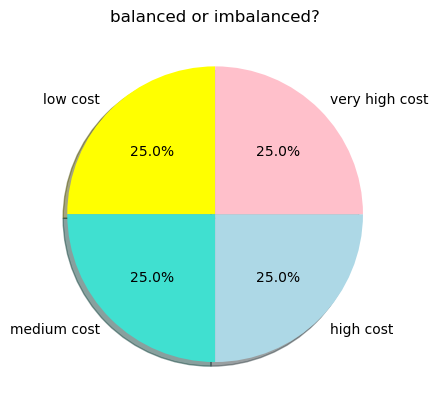

In [23]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]
values = data['price_range'].value_counts().values
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('balanced or imbalanced?')
plt.show()
#dataset is balanced


We split our dataset into 'training' and 'validation' datasets. And, we are going to see our models' accuracy by applying them on validation dataset.

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 101, stratify = y)


In [33]:
# check whether the split works correctly 
print(x_train.shape)
print(x_valid.shape)

(1600, 20)
(400, 20)


In [37]:
import sys
sys.executable



'C:\\Users\\swath\\Desktop\\sample_project\\env\\python.exe'

In [1]:
import seaborn as sns



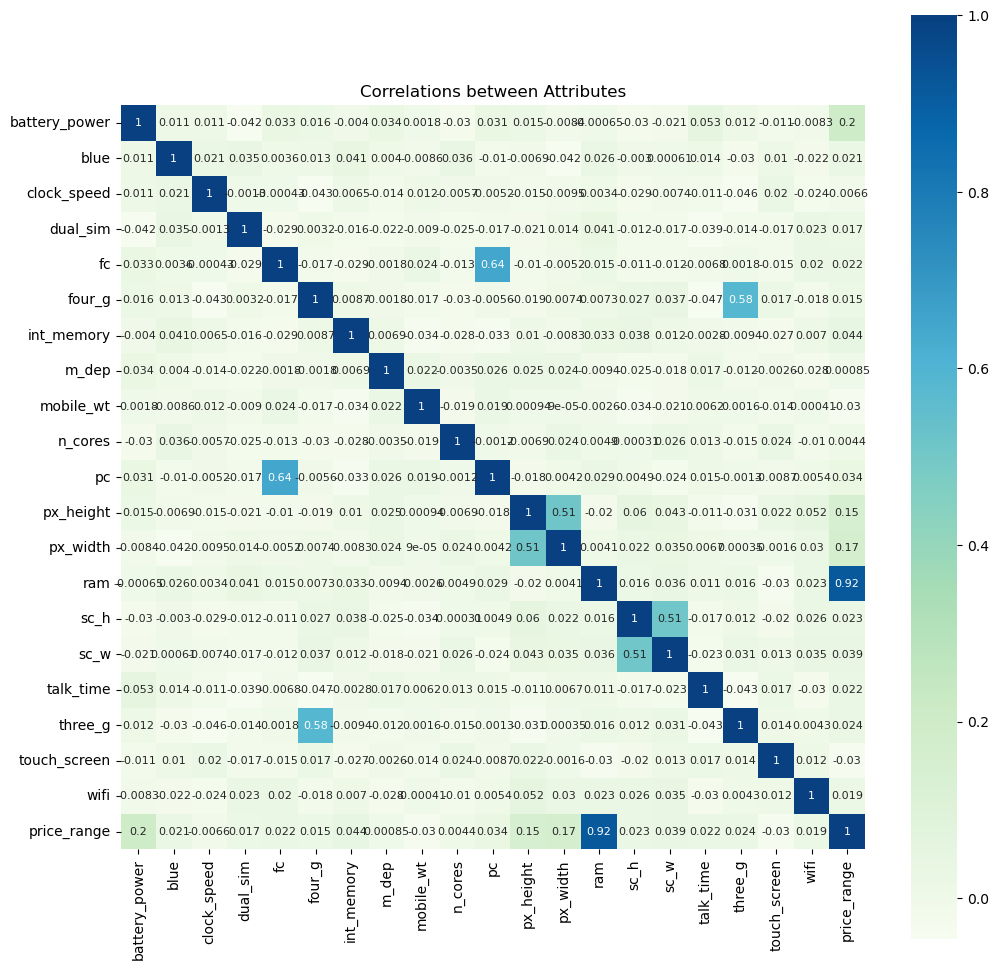

In [43]:
#  correlation btw features and target variable using heatmap:
fig = plt.subplots (figsize = (12, 12))
sns.heatmap(data.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

**Implementation of ML Algorithms**
To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.


**Decision tree**,
**Random forest**,
**KNN**

**Decision Tree**
Decision tree is one of the most popular supervised learning algorithm that is mostly used in classification problems.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np

In [53]:
X = data.drop(columns=['price_range'])  # Features
y = data['price_range']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
correct = 0
total = len(y_test)

# Iterate through predicted and true labels
for pred, true in zip(y_pred, y_test):
    if pred == true:
        correct += 1

accuracy = correct / total
print("Accuracy (Decision Tree Classifier):", accuracy)


Accuracy (Decision Tree Classifier): 0.835


In [46]:
squared_diff_sum = 0.0
total = len(y_test)

for pred, true in zip(y_pred, y_test):
    squared_diff_sum += (pred - true) ** 2

mean_squared_diff = squared_diff_sum / total
rmse = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (Manual Calculation):", rmse)

Root Mean Squared Error (Manual Calculation): 0.406201920231798


**Random Forest**
Random forest is a type of ensemble method of machine learning. It deals with overfitting problem and increase accuracy compared to a simple decision tree model.

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load your dataset (assuming it's in a pandas DataFrame)
# Replace 'your_dataset.csv' with the path to your dataset file
data = pd.read_csv('C:\\Users\\swath\\Desktop\\sample_project\\data.csv')

# Extract features (attributes) and target variable
X = data.drop(columns=['price_range'])  # Features
y = data['price_range']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred_cls = clf.predict(X_test)

# Calculate accuracy manually
correct_cls = 0
total_cls = len(y_test)
for pred, true in zip(y_pred_cls, y_test):
    if pred == true:
        correct_cls += 1
accuracy_cls = correct_cls / total_cls

print("Accuracy (Random Forest Classifier):", accuracy_cls)

# Random Forest Regressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)

# Calculate RMSE manually
squared_diff_sum = 0.0
total_reg = len(y_test)

for pred, true in zip(y_pred_reg, y_test):
    squared_diff_sum += (pred - true) ** 2

mean_squared_diff = squared_diff_sum / total_reg
rmse_reg = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (Random Forest Regressor):", rmse_reg)

Accuracy (Random Forest Classifier): 0.8825
Root Mean Squared Error (Random Forest Regressor): 0.26381290718992506


**K-Nearest Neighbors (KNN)**
K is the number of nearest training points which we classify them using the majority vote.

In [48]:
model_knn = KNeighborsClassifier(n_neighbors=3)  
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
X = data.drop(columns=['price_range'])  # Features
y = data['price_range']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN) Classifier
def knn_classifier_predict(X_train, y_train, X_test, k):
    predictions = []
    for x_test in X_test.values:
        # Calculate distances between x_test and all points in X_train
        distances = []
        for x_train in X_train.values:
            distance = np.sqrt(np.sum((x_test - x_train) ** 2))
            distances.append(distance)

        # Get indices of k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get labels of k nearest neighbors
        k_nearest_labels = y_train.iloc[k_nearest_indices]

        # Predict label by majority voting
        prediction = k_nearest_labels.value_counts().idxmax()
        predictions.append(prediction)
    
    return predictions

# Set the value of k for KNN
k = 5

# Make predictions using KNN classifier
y_pred_cls = knn_classifier_predict(X_train, y_train, X_test, k)

# Calculate accuracy manually
correct_cls = 0
total_cls = len(y_test)
for pred, true in zip(y_pred_cls, y_test):
    if pred == true:
        correct_cls += 1
accuracy_cls = correct_cls / total_cls

print("Accuracy (K-Nearest Neighbors Classifier):", accuracy_cls)

# K-Nearest Neighbors (KNN) Regressor
def knn_regressor_predict(X_train, y_train, X_test, k):
    predictions = []
    for x_test in X_test.values:
        # Calculate distances between x_test and all points in X_train
        distances = []
        for x_train in X_train.values:
            distance = np.sqrt(np.sum((x_test - x_train) ** 2))
            distances.append(distance)

        # Get indices of k nearest neighbors
        k_nearest_indices = np.argsort(distances)[:k]

        # Get labels of k nearest neighbors
        k_nearest_labels = y_train.iloc[k_nearest_indices]

        # Predict label by averaging
        prediction = k_nearest_labels.mean()
        predictions.append(prediction)
    
    return predictions

# Make predictions using KNN regressor
y_pred_reg = knn_regressor_predict(X_train, y_train, X_test, k)

# Calculate RMSE manually
squared_diff_sum = 0.0
total_reg = len(y_test)

for pred, true in zip(y_pred_reg, y_test):
    squared_diff_sum += (pred - true) ** 2

mean_squared_diff = squared_diff_sum / total_reg
rmse_reg = np.sqrt(mean_squared_diff)

print("Root Mean Squared Error (K-Nearest Neighbors Regressor):", rmse_reg)

Accuracy (K-Nearest Neighbors Classifier): 0.9425
Root Mean Squared Error (K-Nearest Neighbors Regressor): 0.22449944320643642


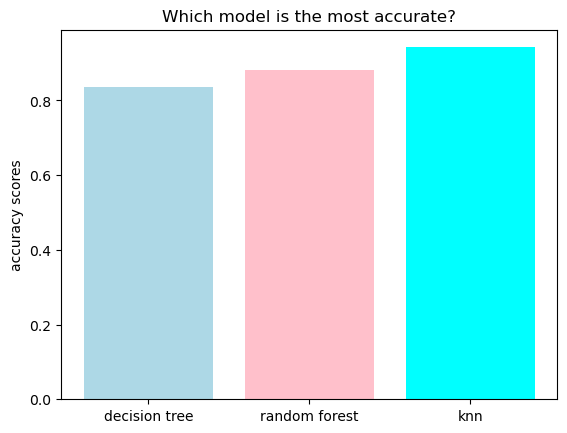

In [51]:
models = ['decision tree', 'random forest', 'knn']
acc_scores = [0.835, 0.8825,0.9425]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

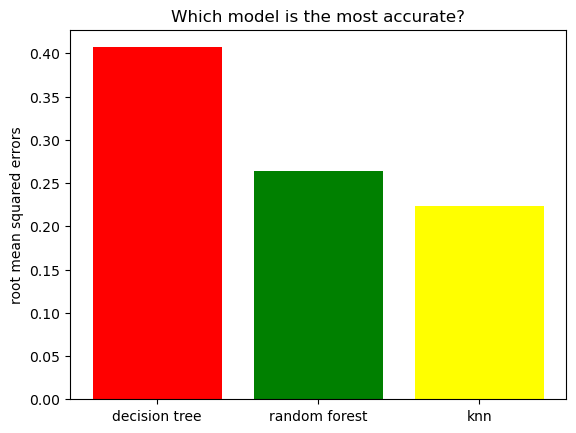

In [54]:
models = ['decision tree', 'random forest', 'knn']
rmse_scores = [0.407, 0.264,0.224]

plt.bar(models, rmse_scores, color=['red', 'green', 'yellow'])
plt.ylabel("root mean squared errors")
plt.title("Which model is the most accurate?")
plt.show()

**Conclusion**
Since Knn has the highest accuracy and least root mean squared error compared to decision tree and random forest, it is the best model for the given set of data.

In [1]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Find the correlation with the target attribute 'price_range'
correlation_with_price = correlation_matrix['price_range'].abs().sort_values(ascending=False)

# Select the top 9 attributes with the highest correlation
top_9_attributes = correlation_with_price[1:10]  # Excluding 'price_range' itself

# Print the top 9 attributes
print("Top 9 attributes most correlated with 'price_range':")
print(top_9_attributes.index.tolist())

NameError: name 'data' is not defined